In [12]:
import numpy as np
from pyscf import gto, scf, mcscf
import jax
from jax import random

from qmc.pyscftools import orbital_evaluator_from_pyscf
from qmc.setting import initialize_calculation, determine_complex_settings
from qmc.mc import limdrift
from qmc.orbitals import *
from qmc.determinants import *
from qmc.extract import *
from qmc.mc import vmc
from qmc.plot import *

import pyscf
import pyqmc.api as pyq
import warnings


In [13]:
warnings.filterwarnings("ignore")

key = jax.random.PRNGKey(seed=42)

mol = pyscf.gto.M(
    atom="""
         H 0. 0. 0.;
         H 0. 0. 2.0
         """,
    basis="sto-3g",
    unit="bohr",
    verbose=0,
)

nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [14]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.5,
         n_blocks=10,
         nsteps_per_block=10,
         blockoffset=0,
         mode="symmetric",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.5103100538253784
Starting production : 10 blocks of 10 steps
Block 1/10, Energy: -1.049604 ± 0.188537, Acceptance: 0.5060
Maximum ages: [10  9]
Block 2/10, Energy: -1.002763 ± 0.271265, Acceptance: 0.5040
Maximum ages: [13 15]
Block 3/10, Energy: -1.095057 ± 0.268545, Acceptance: 0.5185
Maximum ages: [14 16]
Block 4/10, Energy: -1.026512 ± 0.231248, Acceptance: 0.5055
Maximum ages: [15 16]
Block 5/10, Energy: -0.986870 ± 0.234177, Acceptance: 0.4990
Maximum ages: [15 16]
Block 6/10, Energy: -1.035794 ± 0.270343, Acceptance: 0.5060
Maximum ages: [15 16]
Block 7/10, Energy: -1.073394 ± 0.284848, Acceptance: 0.4900
Maximum ages: [15 16]
Block 8/10, Energy: -0.999542 ± 0.222688, Acceptance: 0.5085
Maximum ages: [15 16]
Block 9/10, Energy: -1.046551 ± 0.193489, Acceptance: 0.5160
Maximum ages: [15 16]
Block 10/10, Energy: -1.023780 ± 0.242941, Acceptance: 0.5040
Maximum ages: [15 16]

Final energy: -1.033987 ± 0.010114
Average accep

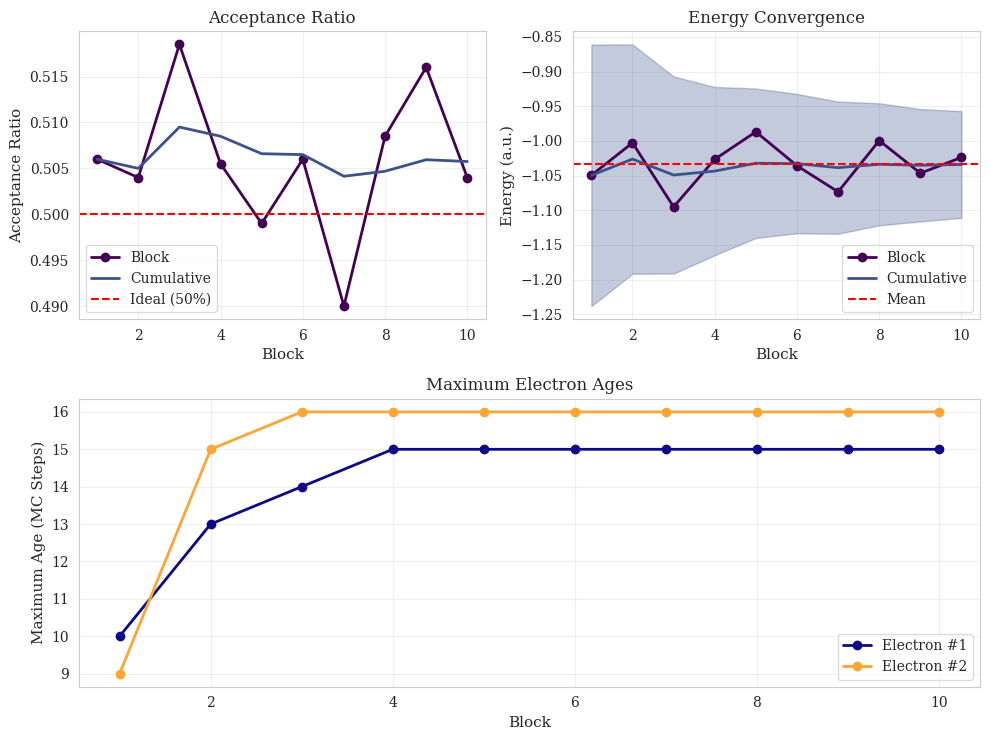

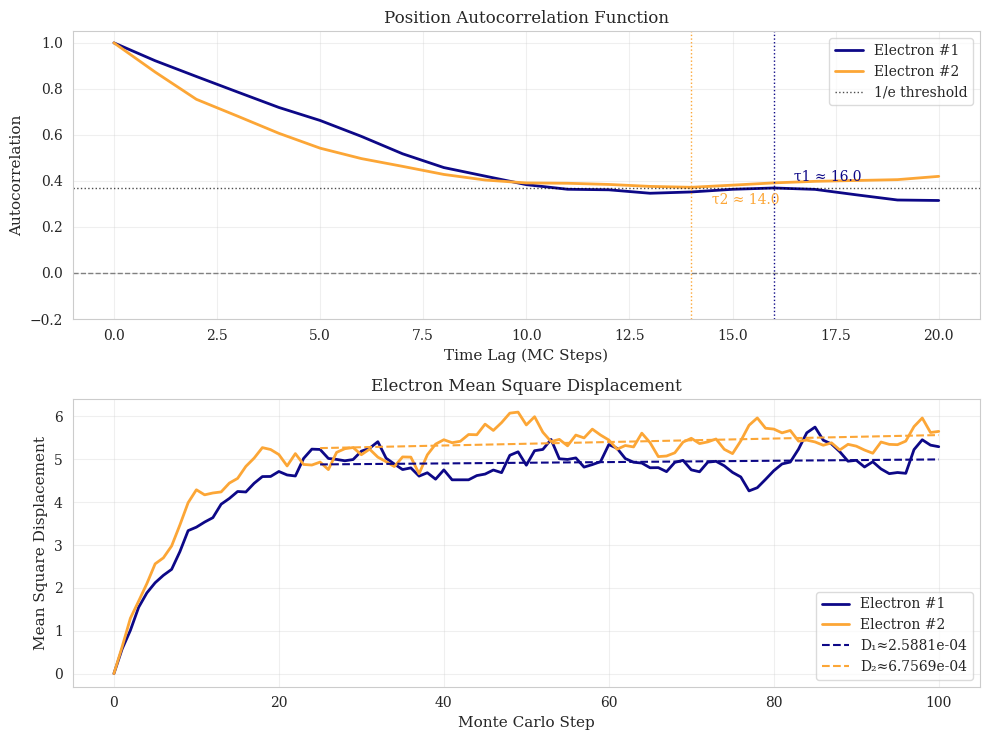

Analysis complete for !


{'Energy': '-1.033987 ± 0.010114',
 'Acceptance': '0.5058',
 'Max_Age_E1': '15',
 'Max_Age_E2': '16',
 'Autocorr_Time_E1': np.int64(14),
 'Diffusion_E1': '2.5881e-04',
 'Diffusion_E2': '6.7569e-04'}

In [15]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_nstep_SM_10", dpi = 300)

In [16]:
warnings.filterwarnings("ignore")

key = jax.random.PRNGKey(seed=42)

mol = pyscf.gto.M(
    atom="""
         H 0. 0. 0.;
         H 0. 0. 2.0
         """,
    basis="sto-3g",
    unit="bohr",
    verbose=0,
)

nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [17]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.5,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="symmetric",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.5103100538253784
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -1.033987 ± 0.076867, Acceptance: 0.5057
Maximum ages: [15 16]
Block 2/10, Energy: -1.050752 ± 0.093524, Acceptance: 0.5076
Maximum ages: [23 24]
Block 3/10, Energy: -1.044895 ± 0.096311, Acceptance: 0.5047
Maximum ages: [23 24]
Block 4/10, Energy: -1.101280 ± 0.109490, Acceptance: 0.5052
Maximum ages: [23 24]
Block 5/10, Energy: -1.024896 ± 0.079107, Acceptance: 0.5038
Maximum ages: [23 24]
Block 6/10, Energy: -1.079332 ± 0.130356, Acceptance: 0.5069
Maximum ages: [23 24]
Block 7/10, Energy: -1.025159 ± 0.087226, Acceptance: 0.5054
Maximum ages: [23 24]
Block 8/10, Energy: -1.041073 ± 0.075266, Acceptance: 0.5118
Maximum ages: [23 24]
Block 9/10, Energy: -1.042784 ± 0.076341, Acceptance: 0.5095
Maximum ages: [23 25]
Block 10/10, Energy: -1.074143 ± 0.108165, Acceptance: 0.5057
Maximum ages: [23 25]

Final energy: -1.051830 ± 0.007551
Average acce

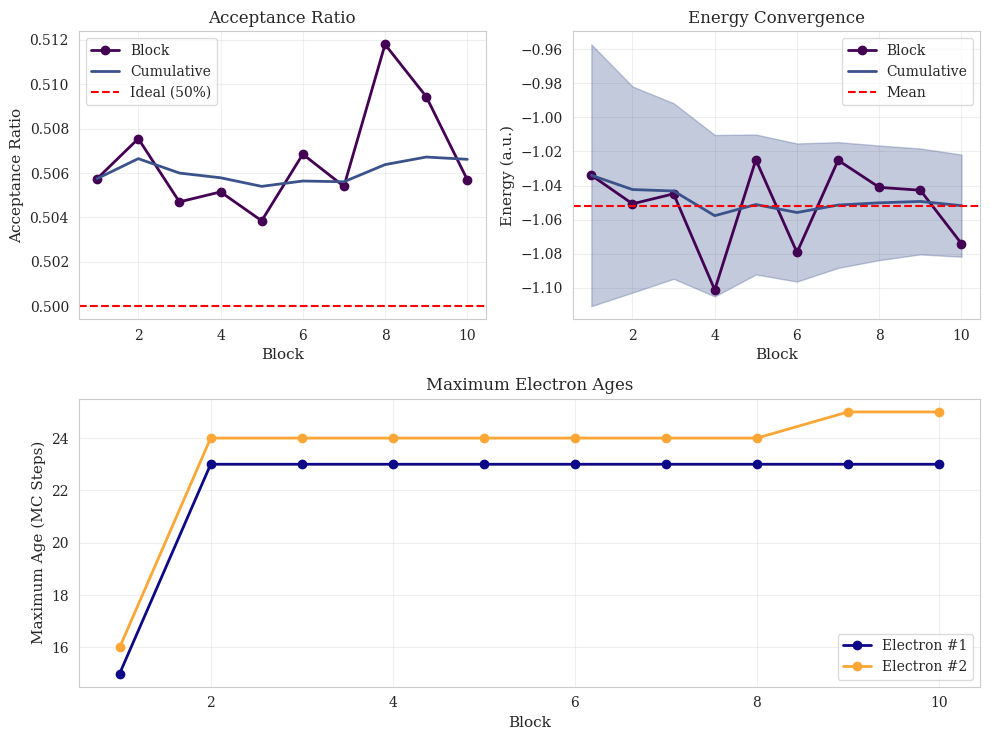

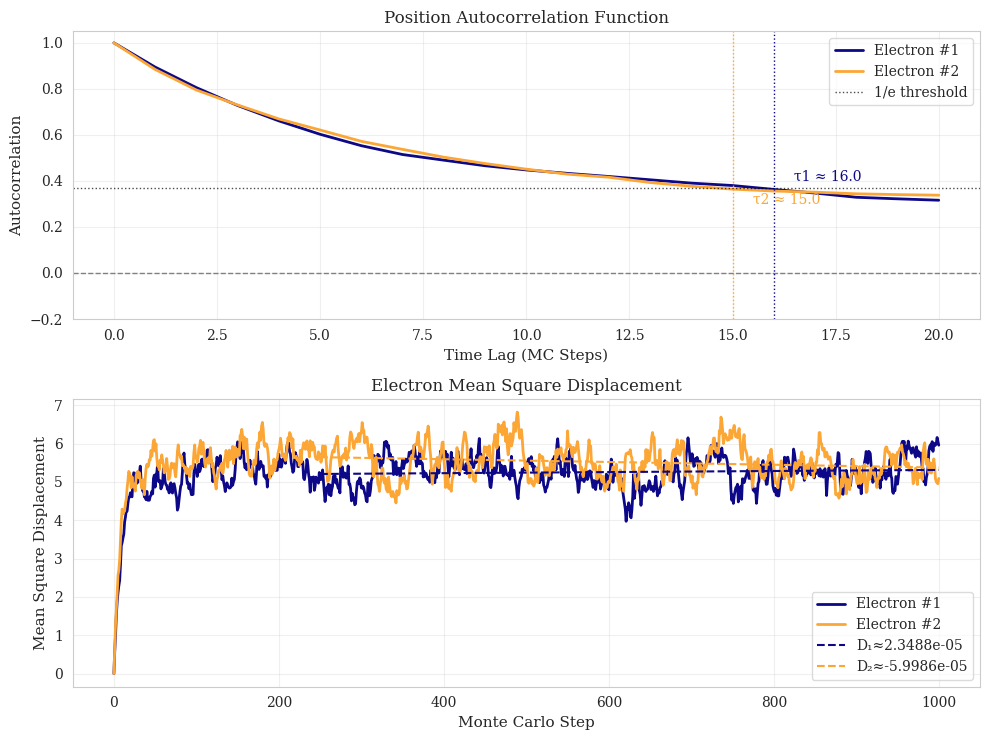

Analysis complete for !


{'Energy': '-1.051830 ± 0.007551',
 'Acceptance': '0.5066',
 'Max_Age_E1': '23',
 'Max_Age_E2': '25',
 'Autocorr_Time_E1': np.int64(15),
 'Diffusion_E1': '2.3488e-05',
 'Diffusion_E2': '-5.9986e-05'}

In [18]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_nstep_SM_100", dpi = 300)

In [19]:
warnings.filterwarnings("ignore")

key = jax.random.PRNGKey(seed=42)

mol = pyscf.gto.M(
    atom="""
         H 0. 0. 0.;
         H 0. 0. 2.0
         """,
    basis="sto-3g",
    unit="bohr",
    verbose=0,
)

nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_chargebs = jnp.array(mol.atom_charges())

In [20]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.5,
         n_blocks=10,
         nsteps_per_block=1000,
         blockoffset=0,
         mode="symmetric",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.5103100538253784
Starting production : 10 blocks of 1000 steps
Block 1/10, Energy: -1.051830 ± 0.030005, Acceptance: 0.5066
Maximum ages: [23 25]
Block 2/10, Energy: -1.042531 ± 0.027366, Acceptance: 0.5044
Maximum ages: [27 26]
Block 3/10, Energy: -1.049178 ± 0.028756, Acceptance: 0.5083
Maximum ages: [27 26]
Block 4/10, Energy: -1.049049 ± 0.030199, Acceptance: 0.5094
Maximum ages: [29 26]
Block 5/10, Energy: -1.049205 ± 0.026859, Acceptance: 0.5078
Maximum ages: [31 31]
Block 6/10, Energy: -1.052951 ± 0.027570, Acceptance: 0.5088
Maximum ages: [31 31]
Block 7/10, Energy: -1.044733 ± 0.028720, Acceptance: 0.5075
Maximum ages: [31 31]
Block 8/10, Energy: -1.052078 ± 0.027358, Acceptance: 0.5069
Maximum ages: [36 31]
Block 9/10, Energy: -1.046884 ± 0.027681, Acceptance: 0.5073
Maximum ages: [36 33]
Block 10/10, Energy: -1.039005 ± 0.028016, Acceptance: 0.5074
Maximum ages: [36 33]

Final energy: -1.047745 ± 0.001349
Average acc

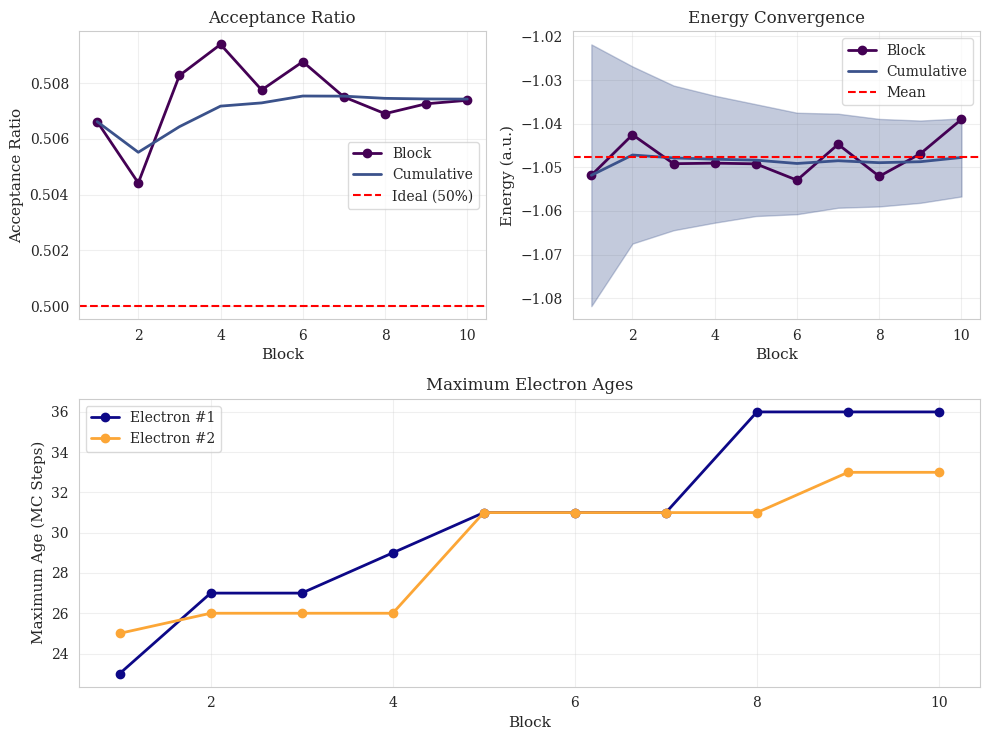

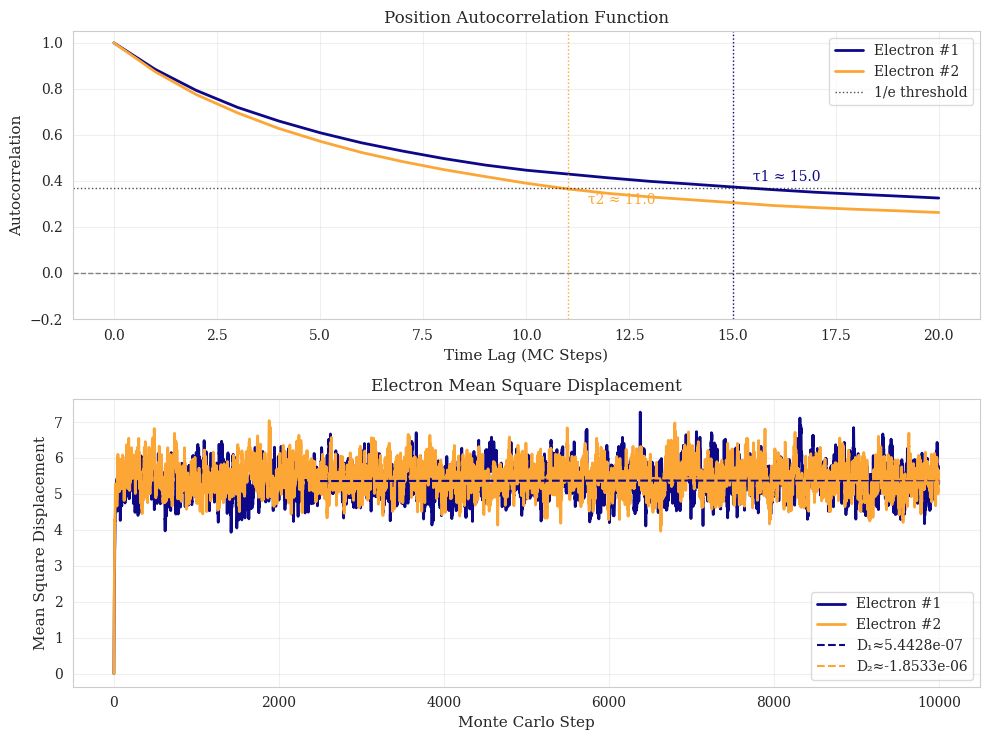

Analysis complete for !


{'Energy': '-1.047745 ± 0.001349',
 'Acceptance': '0.5074',
 'Max_Age_E1': '36',
 'Max_Age_E2': '33',
 'Autocorr_Time_E1': np.int64(11),
 'Diffusion_E1': '5.4428e-07',
 'Diffusion_E2': '-1.8533e-06'}

In [21]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_nstep_SM_1000", dpi = 300)